In [62]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

import matplotlib.pyplot as plt
from matplotlib import style

from matplotlib.figure import Figure
import seaborn as sns
%matplotlib inline

In [63]:
#Loading the data
df = pd.read_csv('../data/train.csv')

In [64]:
df.head()

,name,age,country,batting_side,throwing_hand,height,weight,years,games_started,position,...,stolen_bases,caught_stealing,bases_on_balls,strikeouts,total_bases,hit_by_pitch,sacrafice_hits,sacrafice_flies,intentional_bases_on_balls,salary
0,Miguel Sano,26,Dominican Republic,R,R,76,272,5,99,Third Base,...,0,1,55,159,219,3,0,1,0,2650000.0
1,J.D. Davis,26,United States,R,R,75,218,3,99,Left Field,...,3,0,38,97,216,3,0,2,2,561420.0
2,Frank Schwindel,27,United States,R,R,73,220,1,4,First Base,...,0,0,0,2,1,0,0,0,0,555000.0
3,Robinson Chirinos,35,Venezuela,R,R,73,220,8,106,Catcher,...,1,2,51,125,162,13,2,5,1,5750000.0
4,Jesus Aguilar,29,Venezuela,R,R,75,277,6,52,First Base,...,0,0,31,59,83,2,0,4,0,637500.0


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   name                        130 non-null    object 
 1   age                         130 non-null    int64  
 2   country                     130 non-null    object 
 3   batting_side                130 non-null    object 
 4   throwing_hand               130 non-null    object 
 5   height                      130 non-null    int64  
 6   weight                      130 non-null    int64  
 7   years                       130 non-null    int64  
 8   games_started               130 non-null    int64  
 9   position                    130 non-null    object 
 10  runs                        130 non-null    int64  
 11  stolen_bases                130 non-null    int64  
 12  caught_stealing             130 non-null    int64  
 13  bases_on_balls              130 non

In [66]:
#Descriptive Statistics
df.describe().round(2)

,age,height,weight,years,games_started,runs,stolen_bases,caught_stealing,bases_on_balls,strikeouts,total_bases,hit_by_pitch,sacrafice_hits,sacrafice_flies,intentional_bases_on_balls,salary
count,130.00,130.00,130.00,130.00,130.00,130.00,130.00,130.00,130.00,130.00,130.00,130.00,130.00,130.00,130.00,130.00
mean,28.81,73.35,214.97,6.75,86.10,46.96,4.52,1.58,31.19,79.22,147.99,3.91,0.66,2.32,1.73,5503436.56
std,3.65,2.14,20.46,3.61,47.05,32.76,6.60,2.21,24.85,46.92,99.88,3.85,1.40,2.27,2.74,7183196.22
min,22.00,68.00,170.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,100000.00
25%,26.00,72.00,200.00,4.00,46.75,19.25,0.00,0.00,12.25,37.50,68.25,1.00,0.00,1.00,0.00,575500.00
50%,28.00,73.00,213.00,6.00,91.50,45.00,2.00,1.00,28.00,75.00,149.50,3.00,0.00,2.00,1.00,2500000.00
75%,31.00,75.00,225.00,8.75,126.00,71.25,5.75,2.00,44.00,114.00,221.50,6.00,1.00,3.00,2.00,7208333.50
max,39.00,79.00,282.00,19.00,162.00,123.00,35.00,10.00,119.00,178.00,343.00,16.00,8.00,10.00,19.00,36833333.00


In [67]:
# sns.pairplot(df)
# plt.show()

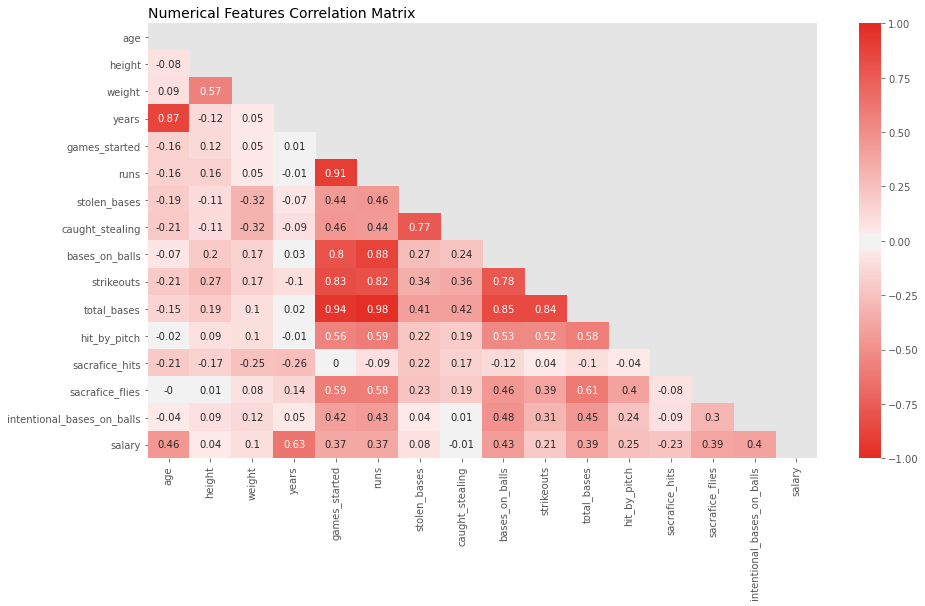

In [68]:
#Correlation
cmap = sns.diverging_palette(13, 13, s=90, n=5, as_cmap=True)
fig, ax = plt.subplots(figsize=(15,8))
style.use('ggplot')
corr = df.corr().round(2)
mask = np.triu(np.ones_like(corr, dtype=np.bool))
ax = sns.heatmap(corr,mask=mask, annot=True, 
            cmap=cmap, vmin = -1, vmax = 1)
plt.title("Numerical Features Correlation Matrix", loc="left", fontsize=14)
plt.show()

Judging by the results of the scatter matrix and the correlation heatmap it seems that there is a lot of colinearity between some of the features.

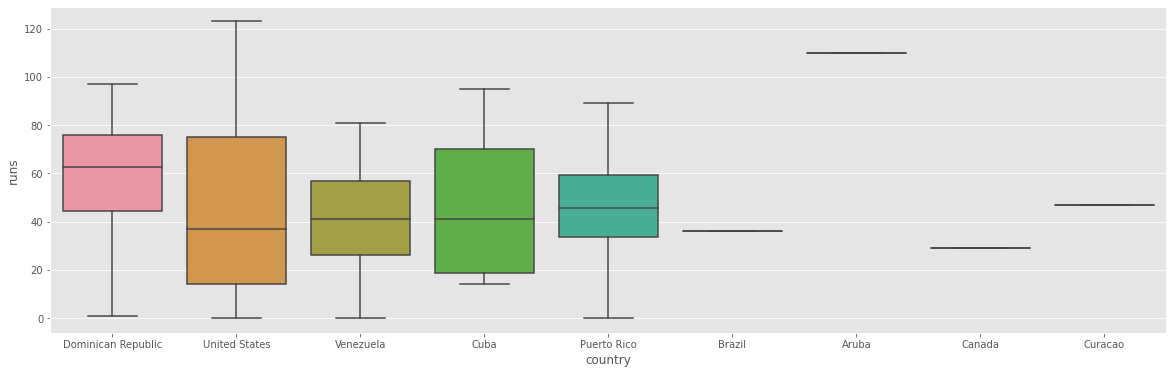

In [70]:
#Analizing players by country
plt.figure(figsize=(20,6))
sns.boxplot(x='country', y='runs', data=df)

In [71]:
df['q4_salary'] = pd.qcut(df['salary']/1000000, q=4)

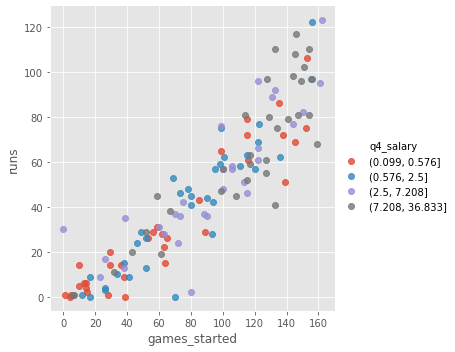

In [73]:
sns.lmplot(x='games_started', y='runs',data=df, hue='q4_salary', fit_reg=False)

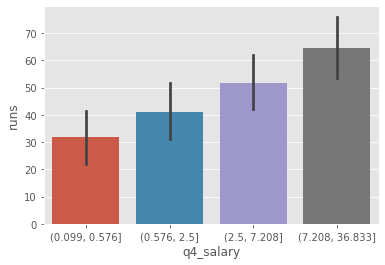

In [74]:
sns.barplot(x='q4_salary',y='runs',data=df, estimator=np.mean)

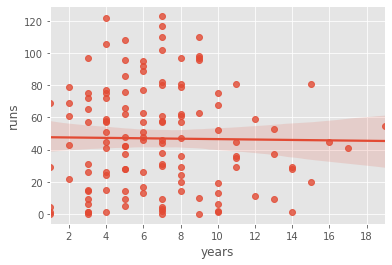

In [76]:
sns.regplot(x='years',y='runs', data=df)

In [13]:
#BMI = 703 × weight (lbs) / [height (in)]2
df['bmi'] = 703 * df['weight'] / df['height']**2

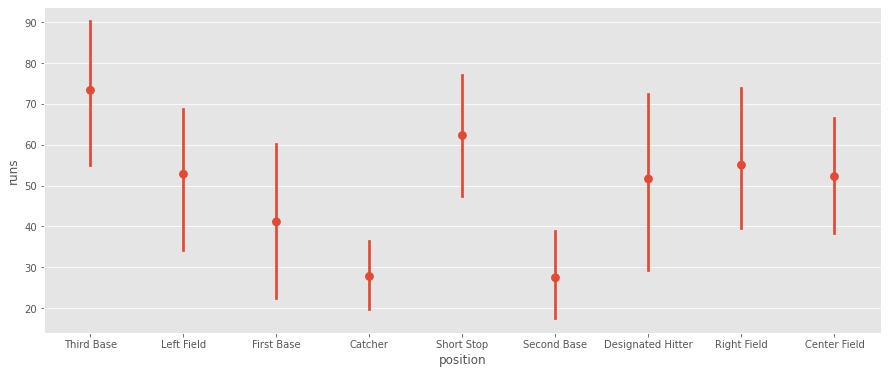

In [77]:
plt.figure(figsize=(15,6))
sns.pointplot(x='position',y='runs',data=df, join=False)

In [79]:
df.describe(include=np.object)

,name,country,batting_side,throwing_hand,position
count,130,130,130,130,130
unique,125,9,1,2,9
top,John Ryan Murphy,United States,R,R,Catcher
freq,2,75,130,129,31


In [26]:
df.head()

,name,age,country,batting_side,throwing_hand,height,weight,years,games_started,position,...,caught_stealing,bases_on_balls,strikeouts,hit_by_pitch,sacrafice_hits,sacrafice_flies,intentional_bases_on_balls,salary,q4_salary,bmi
0,Miguel Sano,26,Dominican Republic,R,R,76,272,5,99,Third Base,...,1,55,159,3,0,1,0,2650000.0,"(2.5, 7.208]",33.105263
1,J.D. Davis,26,United States,R,R,75,218,3,99,Left Field,...,0,38,97,3,0,2,2,561420.0,"(0.099, 0.576]",27.245156
2,Frank Schwindel,27,United States,R,R,73,220,1,4,First Base,...,0,0,2,0,0,0,0,555000.0,"(0.099, 0.576]",29.022331
3,Robinson Chirinos,35,Venezuela,R,R,73,220,8,106,Catcher,...,2,51,125,13,2,5,1,5750000.0,"(2.5, 7.208]",29.022331
4,Jesus Aguilar,29,Venezuela,R,R,75,277,6,52,First Base,...,0,31,59,2,0,4,0,637500.0,"(0.576, 2.5]",34.618844


In [69]:
#Creating a linear regression model and checking the summary
from statsmodels.formula.api import ols
lm = ols('runs ~ age + C(country) + batting_side + throwing_hand + height + weight + years + games_started + C(position) + salary + total_bases + stolen_bases + caught_stealing + bases_on_balls + strikeouts + hit_by_pitch + sacrafice_hits + sacrafice_flies + intentional_bases_on_balls', data=df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   runs   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     127.2
Date:                Fri, 31 Jul 2020   Prob (F-statistic):           6.12e-66
Time:                        16:10:58   Log-Likelihood:                -393.13
No. Observations:                 130   AIC:                             852.3
Df Residuals:                      97   BIC:                             946.9
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                           20.8061     26.538      0.784      0.435     -31.865      73.477
C(country)[T.Brazil]                -3.5624      9.018     -0.395      0.694     -21.460      14.335
C(country)[T.Canada]                 4.7767      9.148      0.522      0.603     -13.379      22.933
C(country)[T.Cuba]                  -0.1491      6.997     -0.021      0.983     -14.036      13.738
C(country)[T.Curacao]                0.0362      8.695      0.004      0.997     -17.221      17.293
C(country)[T.Dominican Republic]     0.1993      6.486      0.031      0.976     -12.674      13.072
C(country)[T.Puerto Rico]           -1.3128      6.633     -0.198      0.844     -14.477      11.852
C(country)[T.United States]          1.1900      6.525      0.182      0.856     -11.760      14.140
C(country)[T.Venezuela]             -1.0794      6.667     -0.162      0.872     -14.311      12.153
throwing_hand[T.R]                   2.4014      6.653      0.361      0.719     -10.802      15.605
C(position)[T.Center Field]          3.9855      2.529      1.576      0.118      -1.034       9.005
C(position)[T.Designated Hitter]    -2.7201      2.469     -1.102      0.273      -7.621       2.181
C(position)[T.First Base]           -1.4381      2.259     -0.637      0.526      -5.922       3.046
C(position)[T.Left Field]           -3.0614      2.717     -1.127      0.263      -8.455       2.332
C(position)[T.Right Field]          -0.0157      2.788     -0.006      0.996      -5.550       5.518
C(position)[T.Second Base]          -0.3133      2.338     -0.134      0.894      -4.953       4.327
C(position)[T.Short Stop]            2.3287      2.457      0.948      0.346      -2.548       7.205
C(position)[T.Third Base]            0.6311      2.420      0.261      0.795      -4.171       5.434
age                                  0.2936      0.359      0.819      0.415      -0.418       1.005
height                              -0.3231      0.363     -0.890      0.376      -1.044       0.397
weight                              -0.0229      0.041     -0.561      0.576      -0.104       0.058
years                               -0.4126      0.412     -1.002      0.319      -1.230       0.405
games_started                       -0.0520      0.040     -1.299      0.197      -0.132       0.027
salary                           -9.417e-08    1.3e-07     -0.724      0.471   -3.52e-07    1.64e-07
total_bases                          0.2821      0.021     13.414      0.000       0.240       0.324
stolen_bases                         0.4459      0.136      3.280      0.001       0.176       0.716
caught_stealing                     -0.4820      0.432     -1.115      0.268      -1.340       0.376
bases_on_balls                       0.2844      0.04

In [ ]:
# R squared is low (0.36) and the p values for the features is high, except for games played.
# The is also some colinearity between age with years, and games played with strike outs.